# Data Project - Stock Market Analysis

## https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook
- 위 데이터를 클론 코딩을 통한 최신화 

## 필요한 라이브러리

In [80]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_datareader
# !pip install yfinance
# !pip install scikit-learn
# !pip install torch torchvision torchaudio 

## What was the change in price of the stock overtime?

In [1]:
import pandas as pd
import numpy as np
########################
import matplotlib.pyplot as plt
import seaborn as sns
########################
import yfinance as yf
from pandas_datareader import data as pdr
########################
from datetime import datetime

In [2]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
yf.pdr_override()

In [4]:
# 애플, 구글, MS, 아마존
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
# 시작 종료일자
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-22,159.300003,162.139999,157.809998,157.830002,156.992020,75701800
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.086182,67622100
2023-03-24,158.860001,160.339996,157.850006,160.250000,159.399170,59196500
2023-03-27,159.940002,160.770004,157.869995,158.279999,157.439636,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,156.812958,45992200
...,...,...,...,...,...,...
2024-03-15,171.169998,172.619995,170.289993,172.619995,172.619995,121664700
2024-03-18,175.570007,177.710007,173.520004,173.720001,173.720001,75604200
2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,55215200


In [87]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,AMAZON
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600,AMAZON
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600,AMAZON
2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43705800,AMAZON
2024-03-15,176.639999,177.929993,173.899994,174.419998,174.419998,72115500,AMAZON
2024-03-18,175.800003,176.690002,174.279999,174.479996,174.479996,31250700,AMAZON
2024-03-19,174.220001,176.089996,173.520004,175.899994,175.899994,26880900,AMAZON
2024-03-20,176.139999,178.529999,174.639999,178.149994,178.149994,29867200,AMAZON


### Data info

In [88]:
df.info() # 전체 데이터의 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2023-03-21 to 2024-03-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1012 non-null   float64
 1   High          1012 non-null   float64
 2   Low           1012 non-null   float64
 3   Close         1012 non-null   float64
 4   Adj Close     1012 non-null   float64
 5   Volume        1012 non-null   int64  
 6   company_name  1012 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.2+ KB


In [89]:
AAPL.info() # 애플 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-03-21 to 2024-03-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [90]:
GOOG.info() # 구글 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-03-21 to 2024-03-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [91]:
MSFT.info() # MS 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-03-21 to 2024-03-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [92]:
AMZN.info() # 아마존 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-03-21 to 2024-03-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


### 기술통계

In [93]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1.012000e+03
mean,198.299903,200.175618,196.568742,198.476680,198.016541,3.985115e+07
std,90.945843,91.585733,90.230319,90.987134,90.528497,2.103861e+07
min,98.070000,98.300003,96.290001,97.239998,97.239998,5.427874e+06
25%,133.152496,134.162495,131.687504,133.207504,133.207504,2.230562e+07
50%,168.970001,170.434998,167.165001,168.614998,168.614998,3.774770e+07
75%,216.865002,218.464996,215.129997,216.655003,215.911510,5.223822e+07
max,429.850006,430.819885,427.171997,428.600006,428.600006,1.529387e+08


In [94]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,180.334309,181.795099,179.001976,180.494625,180.013905,5.720640e+07
std,9.939673,9.795581,9.862417,9.808886,9.909402,1.705187e+07
min,157.320007,158.490005,155.979996,157.649994,156.812958,2.404830e+07
25%,173.050003,174.300003,171.899994,173.500000,172.991058,4.677800e+07
50%,180.089996,181.929993,178.330002,180.570007,179.859726,5.319530e+07
75%,189.259995,189.990005,187.610001,189.300003,188.850006,6.230330e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [95]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,129.851518,131.294111,128.692510,130.026324,130.026324,2.348585e+07
std,12.746596,12.714787,12.713473,12.694373,12.694373,8.442193e+06
min,101.440002,101.610001,100.279999,101.320000,101.320000,6.058236e+06
25%,122.584999,124.440002,121.860001,123.019997,123.019997,1.797650e+07
50%,132.154999,133.600006,130.919998,132.389999,132.389999,2.141090e+07
75%,138.985001,140.000000,137.740005,138.960007,138.960007,2.614830e+07
max,154.009995,155.199997,152.919998,154.839996,154.839996,5.879610e+07


In [96]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,346.644624,349.690080,343.648901,346.875574,345.515737,2.548400e+07
std,38.831520,38.891163,38.661917,38.943539,39.588251,9.447850e+06
min,273.399994,275.000000,269.519989,272.290009,270.073456,5.427874e+06
25%,321.390015,325.350006,319.799988,321.859985,320.305573,2.026700e+07
50%,335.230011,338.540009,333.109985,335.940002,333.933716,2.328140e+07
75%,373.859985,376.220001,371.119995,374.579987,373.888580,2.768390e+07
max,429.850006,430.819885,427.171997,428.600006,428.600006,7.847820e+07


In [97]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,136.369162,137.923181,134.931581,136.510198,136.510198,5.322837e+07
std,21.022750,21.090277,21.009699,21.115006,21.115006,1.913850e+07
min,98.070000,98.300003,96.290001,97.239998,97.239998,1.201670e+07
25%,125.309998,127.360001,124.129997,125.959999,125.959999,4.250550e+07
50%,134.039993,135.649994,133.160004,134.300003,134.300003,4.943090e+07
75%,148.330002,150.539993,146.880005,148.839996,148.839996,5.878130e+07
max,179.988007,181.414993,179.089996,179.830002,179.830002,1.529387e+08


### 종가 데이터

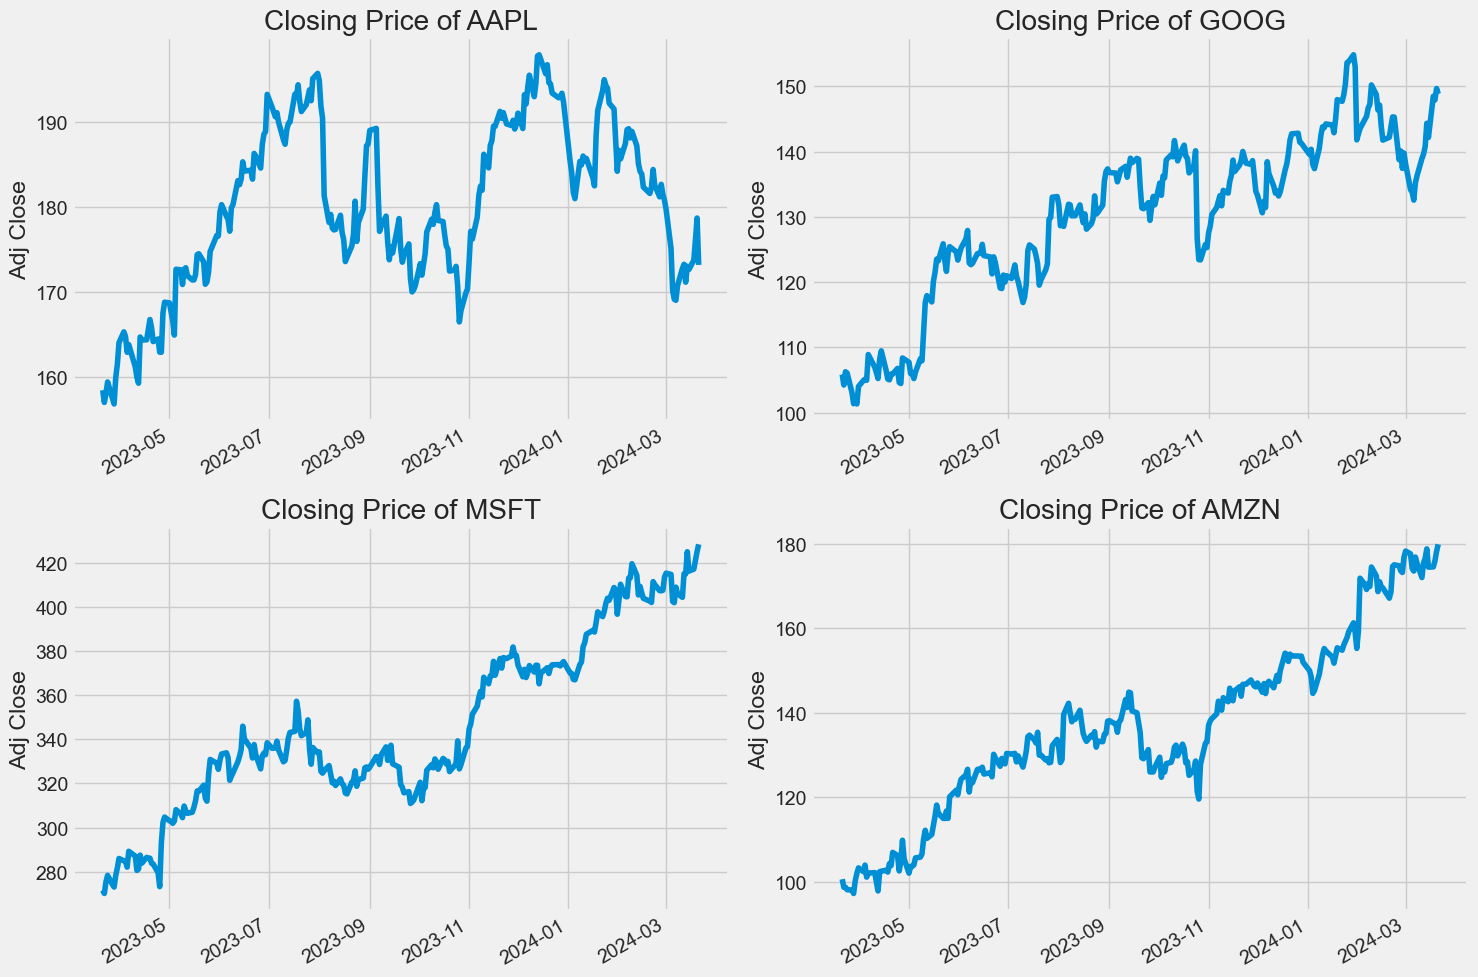

In [98]:
# 각 종목의 종가 차트
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i-1]}')

plt.tight_layout()

### 매출액

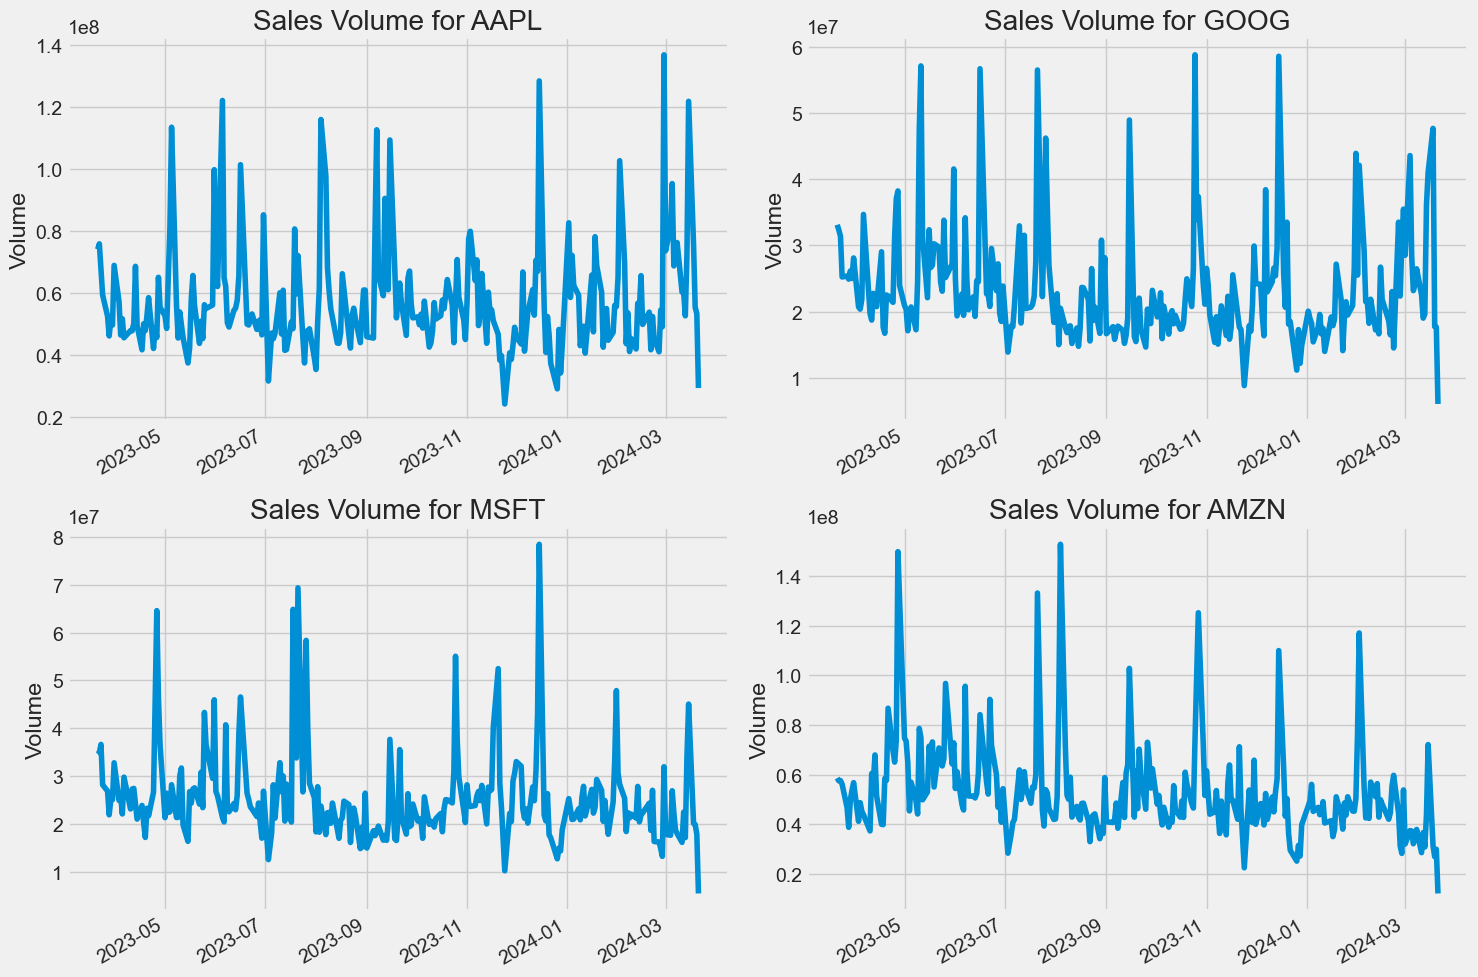

In [99]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Sales Volume for {tech_list[i-1]}')

plt.tight_layout()

## What was the moving average of the various stocks?

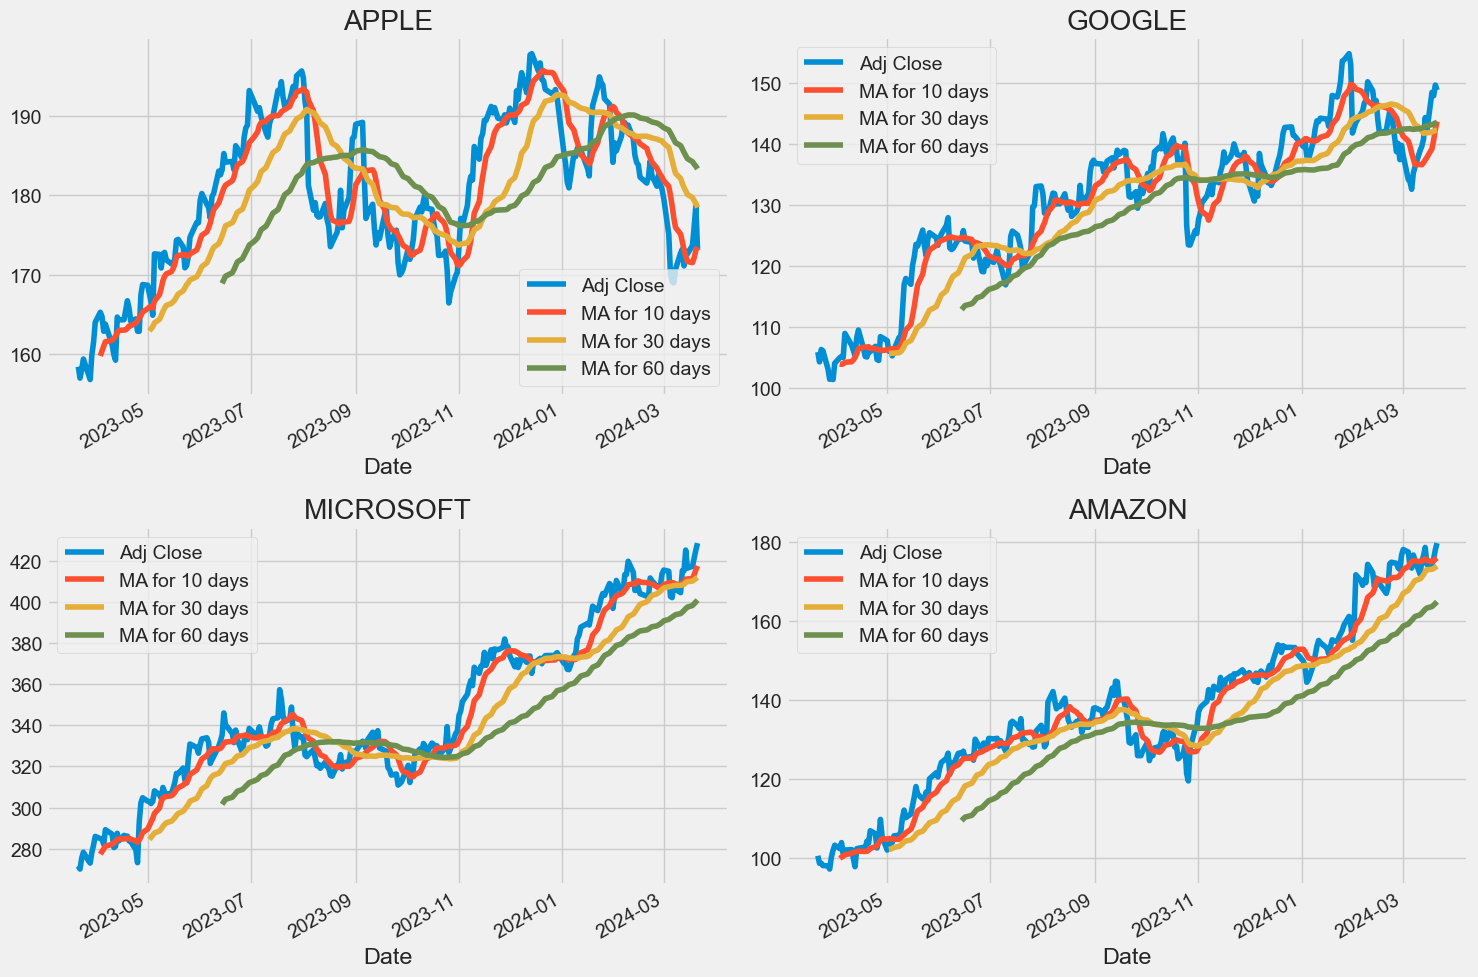

In [100]:
ma_day =[10,30,60] # 이동평균일 10일, 30일, 60일

for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## What was the daily return of the stock on average?

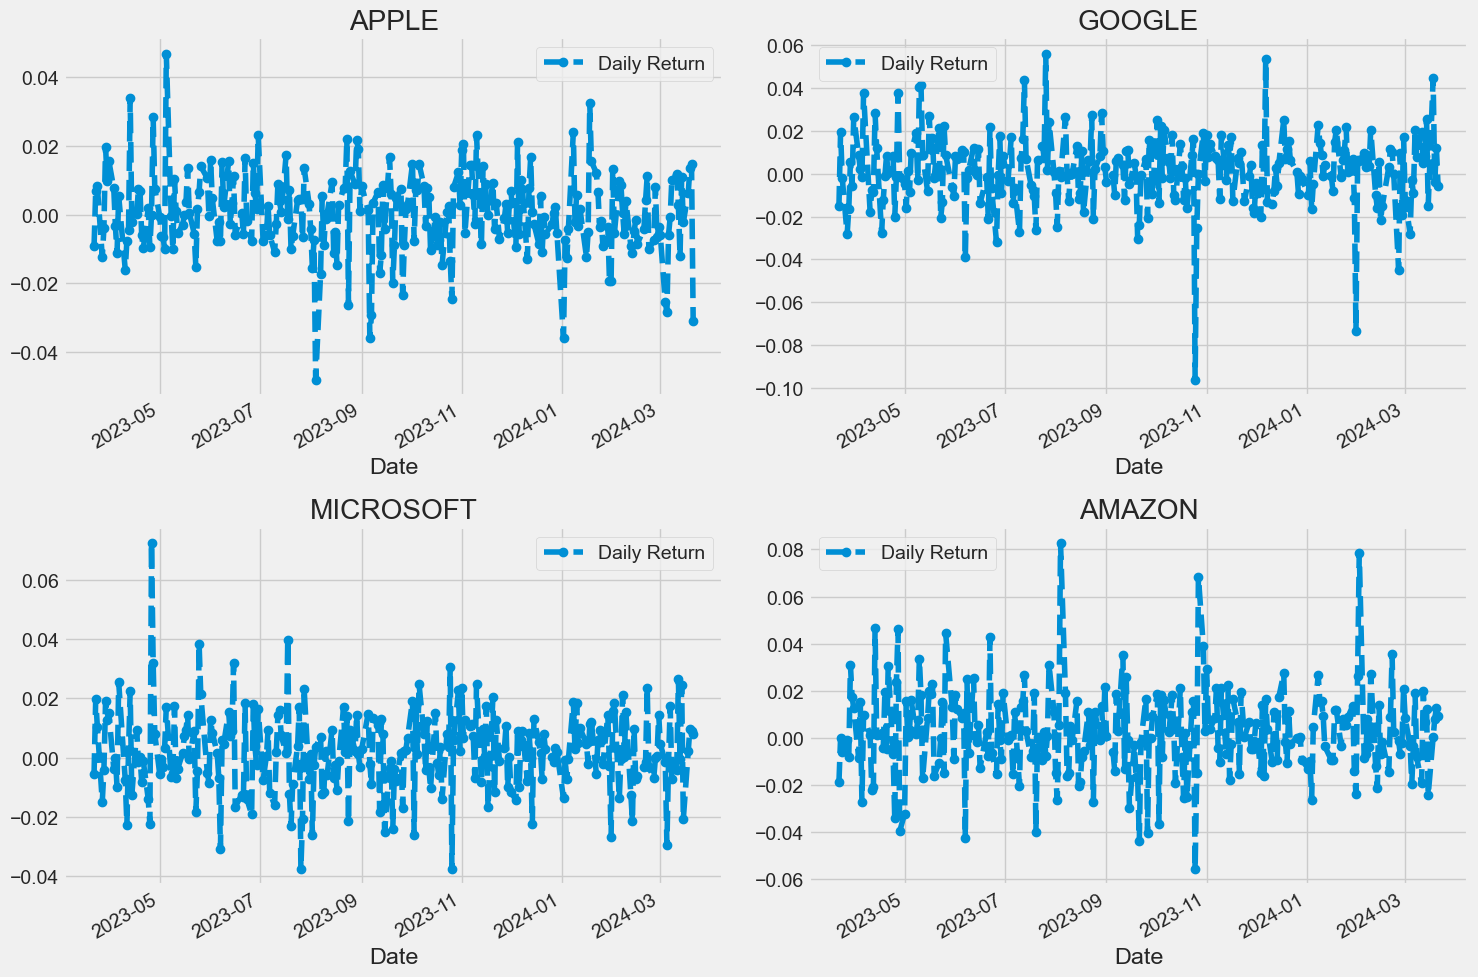

In [101]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True,linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True,linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
    
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True,linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
    
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True,linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

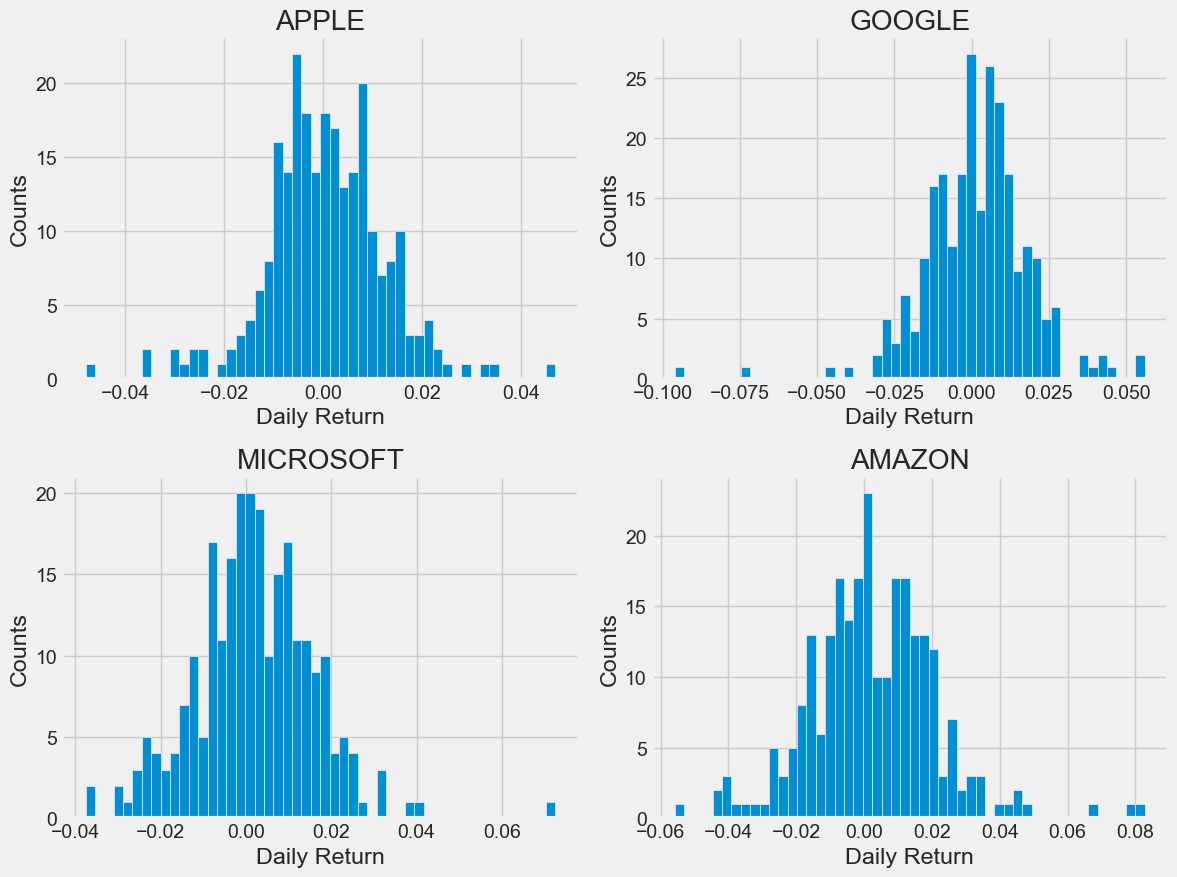

In [102]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout()

## What was the correlation between different stocks closing prices?

In [103]:
closing_df = pdr.get_data_yahoo(tech_list, start=start,end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-21,NaN,NaN,NaN,NaN
2023-03-22,-0.009103,-0.018984,-0.015306,-0.005442
2023-03-23,0.006969,0.000101,0.019574,0.019722
2023-03-24,0.008306,-0.005876,-0.001882,0.010480
2023-03-27,-0.012293,-0.000917,-0.028286,-0.014934


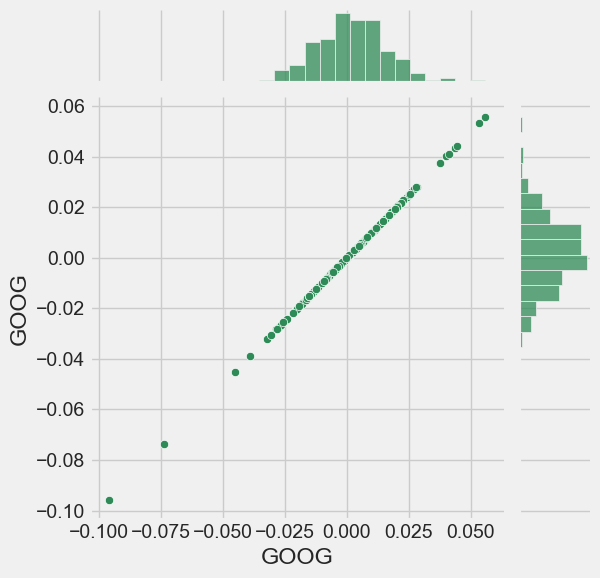

In [104]:
sns.jointplot(x='GOOG', y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

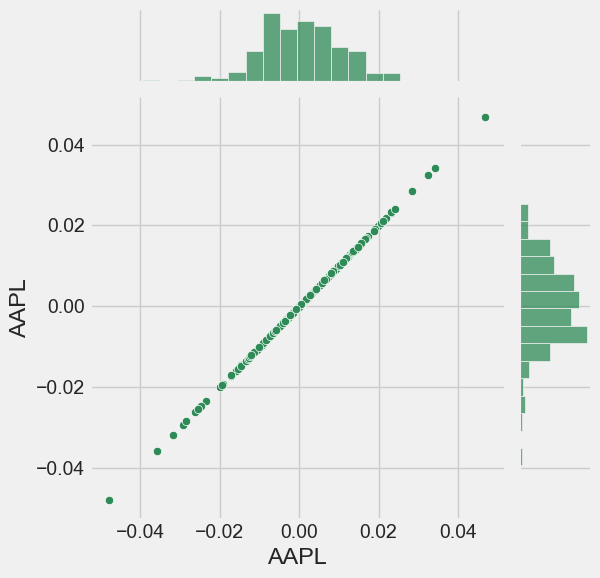

In [105]:
sns.jointplot(x='AAPL', y='AAPL',data=tech_rets,kind='scatter',color='seagreen')

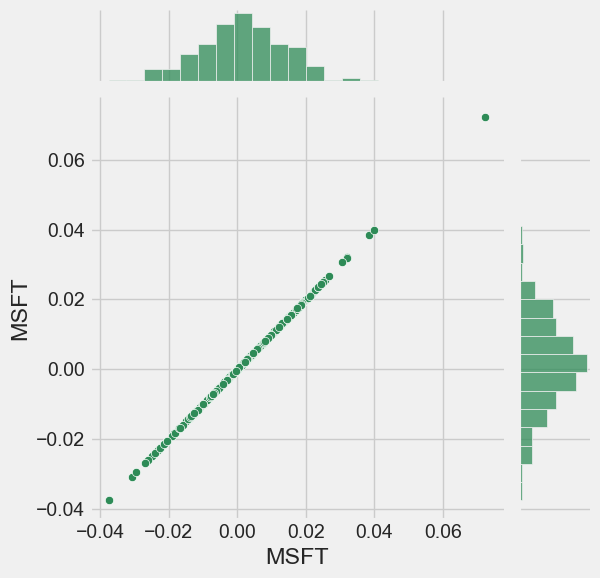

In [106]:
sns.jointplot(x='MSFT', y='MSFT',data=tech_rets,kind='scatter',color='seagreen')

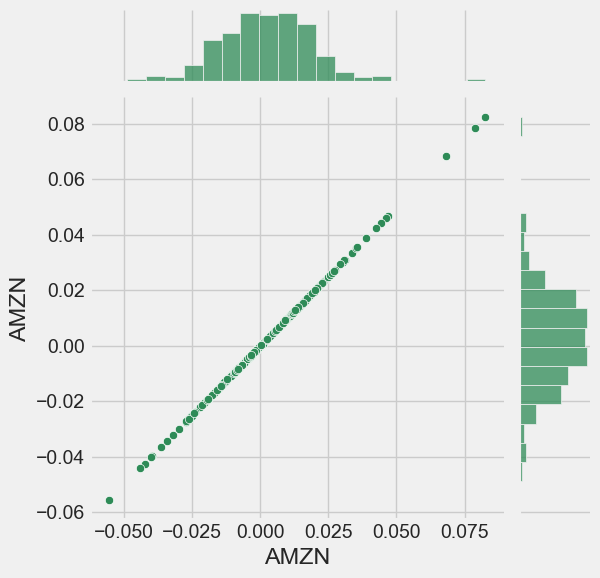

In [107]:
sns.jointplot(x='AMZN', y='AMZN',data=tech_rets,kind='scatter',color='seagreen')

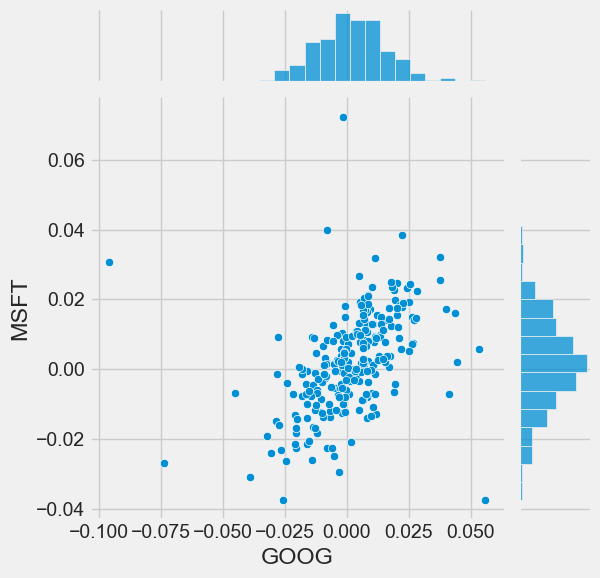

In [108]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

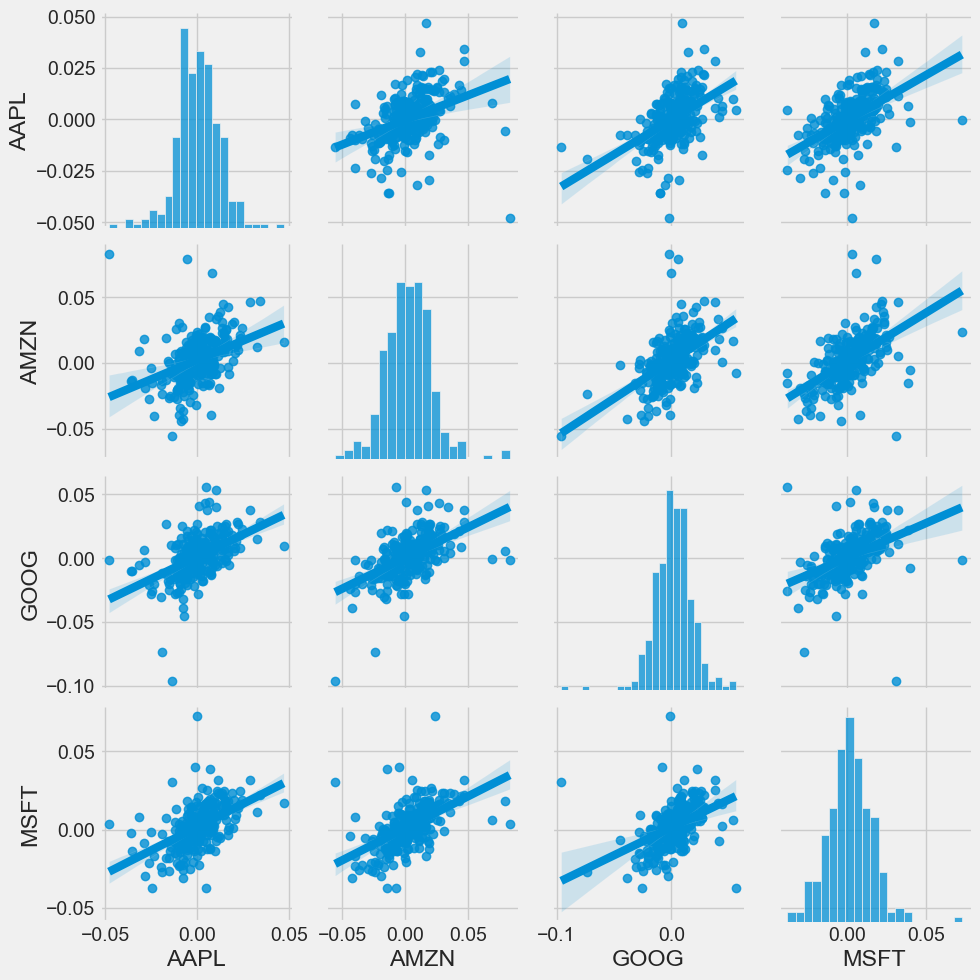

In [109]:
sns.pairplot(tech_rets,kind='reg')

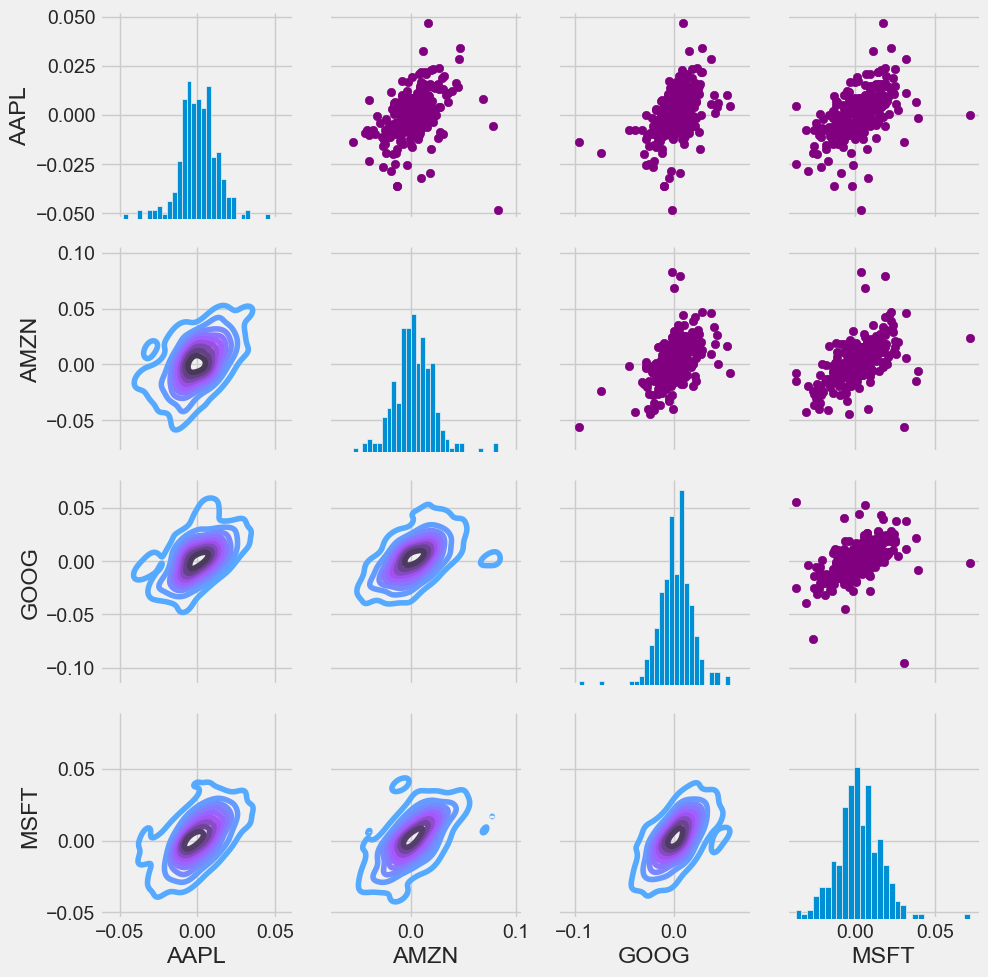

In [110]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

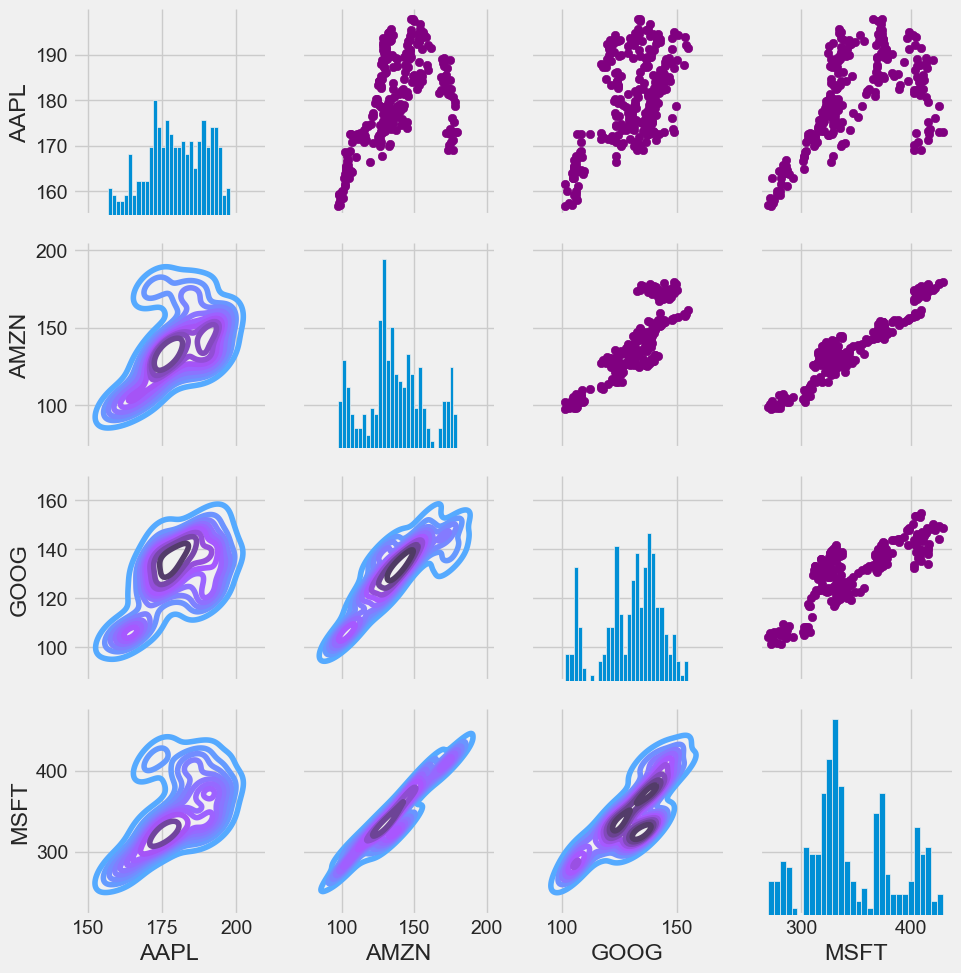

In [111]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

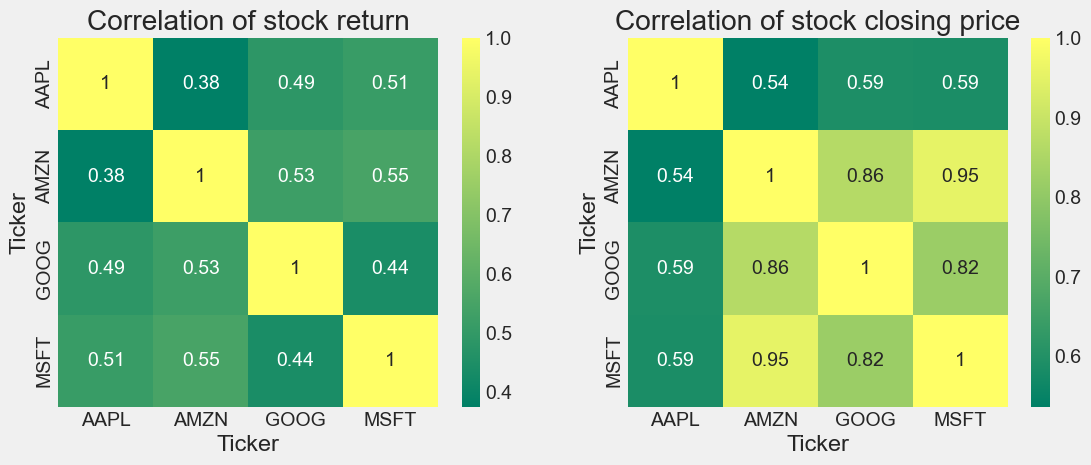

In [112]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## How much value do we put at risk by investing in a particular stock?

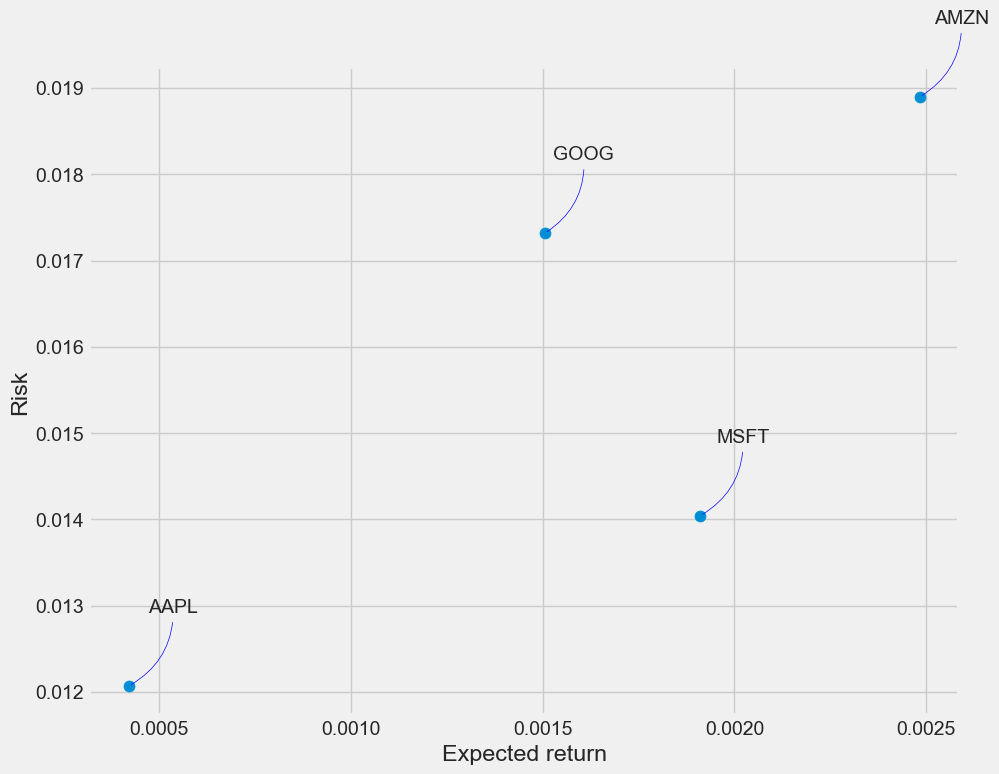

In [113]:
rets = tech_rets.dropna()

area = np.pi *20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right',va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3, rad=-0.3'))

## Predicting the closing price stock price of APPLE inc:

In [114]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01',end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500647,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-03-15,171.169998,172.619995,170.289993,172.619995,172.619995,121664700
2024-03-18,175.570007,177.710007,173.520004,173.720001,173.720001,75604200
2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,55215200


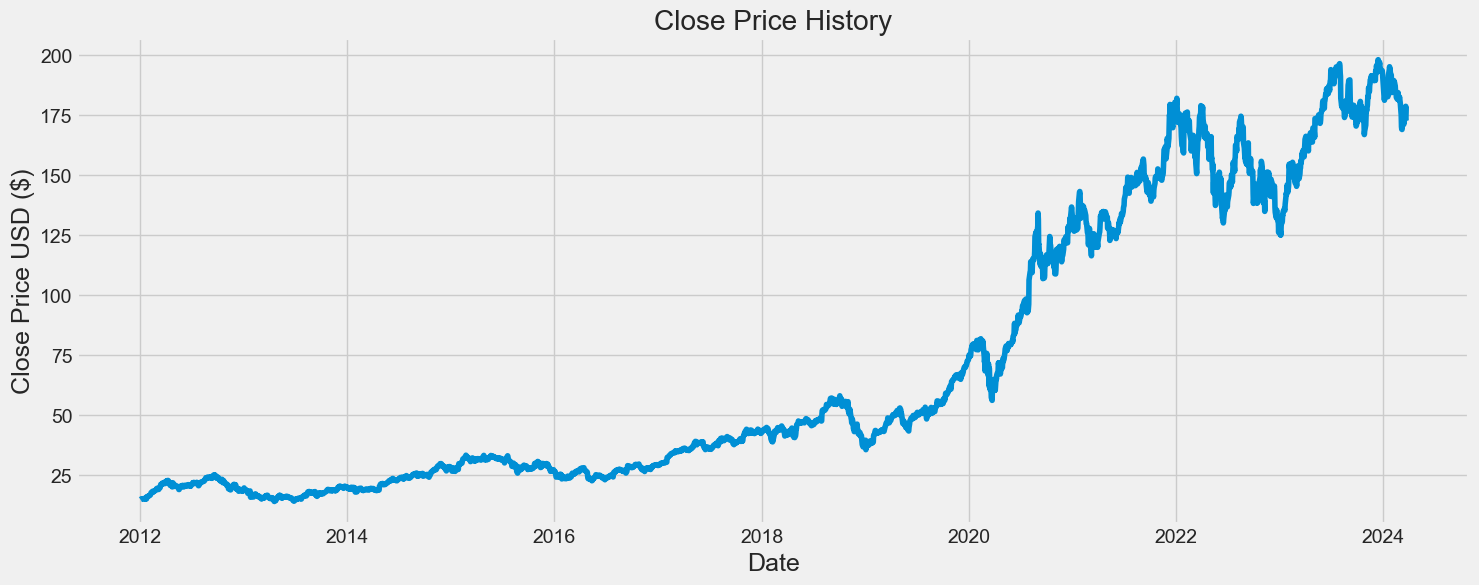

In [115]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [116]:
data =df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil(len(dataset)*.95))

training_data_len

2921

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.88037739],
       [0.89444104],
       [0.86245842]])

In [118]:
train_data = scaled_data[0:int(training_data_len)]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

x_train,y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [119]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2,output_size):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True)
        self.fc1 = nn.Linear(hidden_size2,25)
        self.fc2 = nn.Linear(25, output_size)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out[:,-1,:].unsqueeze(1))
        out = torch.relu(self.fc1(out[:,-1,:]))
        out = self.fc2(out)
        return out
    

In [120]:
x_train_torch = torch.tensor(x_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)

input_size = 1
hidden_size1 = 128
hidden_size2 = 64
output_size = 1
model = LSTMModel(input_size,hidden_size1,hidden_size2, output_size)

In [121]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [122]:
num_epochs = 30
for epoch in range(num_epochs):
    outputs = model(x_train_torch)
    loss = criterion(outputs, y_train_torch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

c:\Users\jsy11\anaconda3\envs\data\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2861])) that is different to the input size (torch.Size([2861, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/30], Loss: 0.2476
Epoch [2/30], Loss: 0.2399
Epoch [3/30], Loss: 0.2325
Epoch [4/30], Loss: 0.2259
Epoch [5/30], Loss: 0.2194
Epoch [6/30], Loss: 0.2131
Epoch [7/30], Loss: 0.2073
Epoch [8/30], Loss: 0.2014
Epoch [9/30], Loss: 0.1950
Epoch [10/30], Loss: 0.1879
Epoch [11/30], Loss: 0.1797
Epoch [12/30], Loss: 0.1699
Epoch [13/30], Loss: 0.1599
Epoch [14/30], Loss: 0.1455
Epoch [15/30], Loss: 0.1196
Epoch [16/30], Loss: 0.0932
Epoch [17/30], Loss: 0.0827
Epoch [18/30], Loss: 0.0844
Epoch [19/30], Loss: 0.0903
Epoch [20/30], Loss: 0.0928
Epoch [21/30], Loss: 0.0913
Epoch [22/30], Loss: 0.0874
Epoch [23/30], Loss: 0.0840
Epoch [24/30], Loss: 0.0823
Epoch [25/30], Loss: 0.0826
Epoch [26/30], Loss: 0.0839
Epoch [27/30], Loss: 0.0849
Epoch [28/30], Loss: 0.0851
Epoch [29/30], Loss: 0.0845
Epoch [30/30], Loss: 0.0835


In [123]:
# 예측값을 얻는 함수
def get_predictions(model, x_data):
    model.eval()  # 모델을 평가 모드로 설정
    with torch.no_grad():  # 그라디언트 계산 비활성화
        predictions = model(x_data)  # 예측 수행
    return predictions

# 예측값의 RMSE 계산 함수
def calculate_rmse(predictions, targets):
    rmse = torch.sqrt(torch.mean((predictions - targets)**2)).item()  # RMSE 계산
    return rmse

# 모델 테스트
predictions = get_predictions(model, x_train_torch)  # 훈련 데이터에 대한 예측 수행
rmse = calculate_rmse(predictions, y_train_torch)  # RMSE 계산
print("RMSE:", rmse)


RMSE: 0.28743651509284973


C:\Users\jsy11\AppData\Local\Temp\ipykernel_19752\4162290310.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


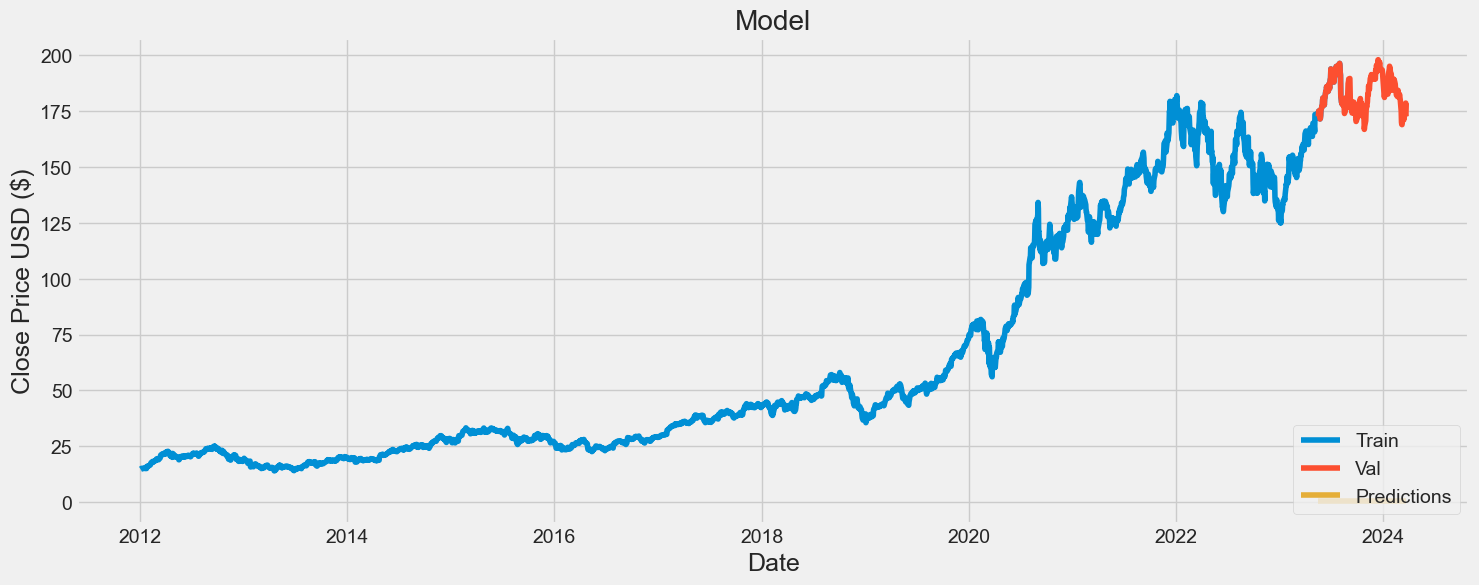

In [124]:
# train, valid 데이터프레임 재구성
train = data[:training_data_len]  # training_data_len만큼의 데이터 선택
valid = data[training_data_len - 60:]  # training_data_len - 60부터의 데이터 선택 (예측에 사용된 마지막 60일 제외)

# predictions 길이 조정
predictions = predictions[:len(valid)]

# valid 데이터프레임에 'Predictions' 열 추가
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [125]:
valid

,Close,Predictions
Date,,
2023-05-17,172.690002,0.257499
2023-05-18,175.050003,0.257499
2023-05-19,175.160004,0.257498
2023-05-22,174.199997,0.257499
2023-05-23,171.559998,0.257501
...,...,...
2024-03-15,172.619995,0.257466
2024-03-18,173.720001,0.257466
2024-03-19,176.080002,0.257466


# 직접

## 볼린저 밴드

In [126]:
# 주식 데이터에 볼린저 밴드 
def calculate_bollinger_bands(data, window=20):
    data['MA20'] = data['Close'].rolling(window).mean()  # 중심선
    data['Upper'] = data['MA20'] + 2 * data['Close'].rolling(window).std()  # 상단 밴드
    data['Lower'] = data['MA20'] - 2 * data['Close'].rolling(window).std()  # 하단 밴드
    return data

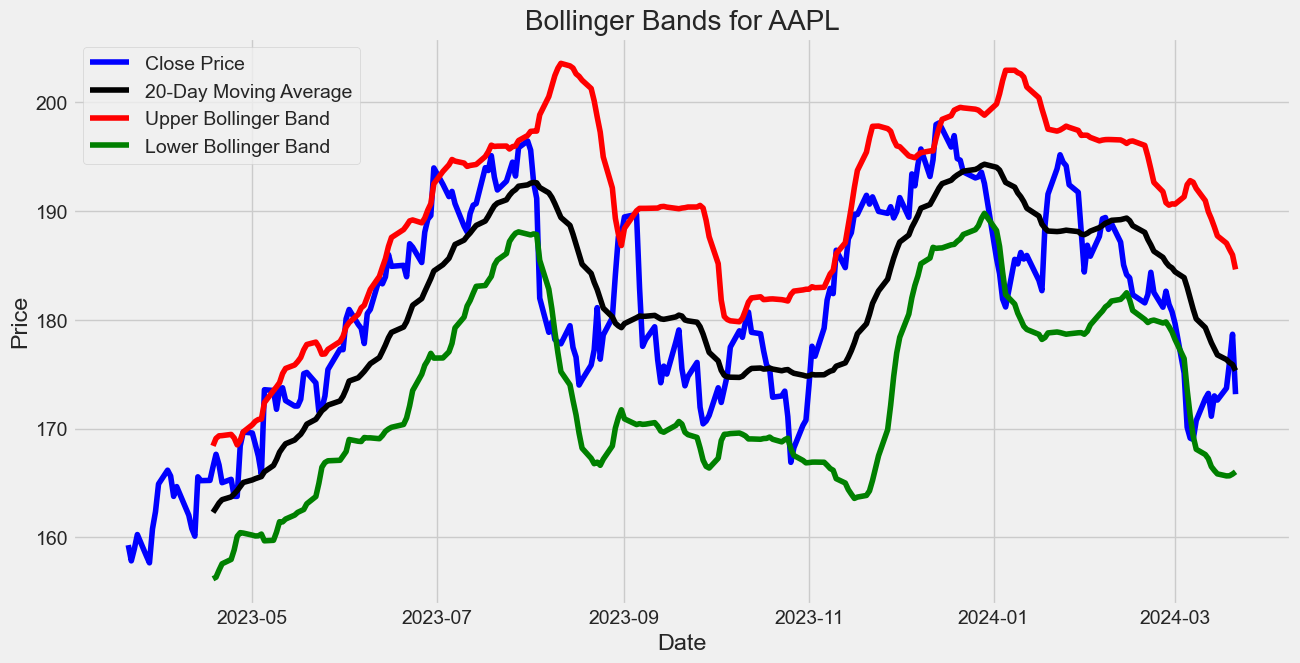

In [127]:
# 볼린저 밴드 계산
AAPL = calculate_bollinger_bands(AAPL)

# 볼린저 밴드 시각화
plt.figure(figsize=(14,7))
plt.plot(AAPL['Close'], label='Close Price', color='blue')
plt.plot(AAPL['MA20'], label='20-Day Moving Average', color='black')
plt.plot(AAPL['Upper'], label='Upper Bollinger Band', color='red')
plt.plot(AAPL['Lower'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands for AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

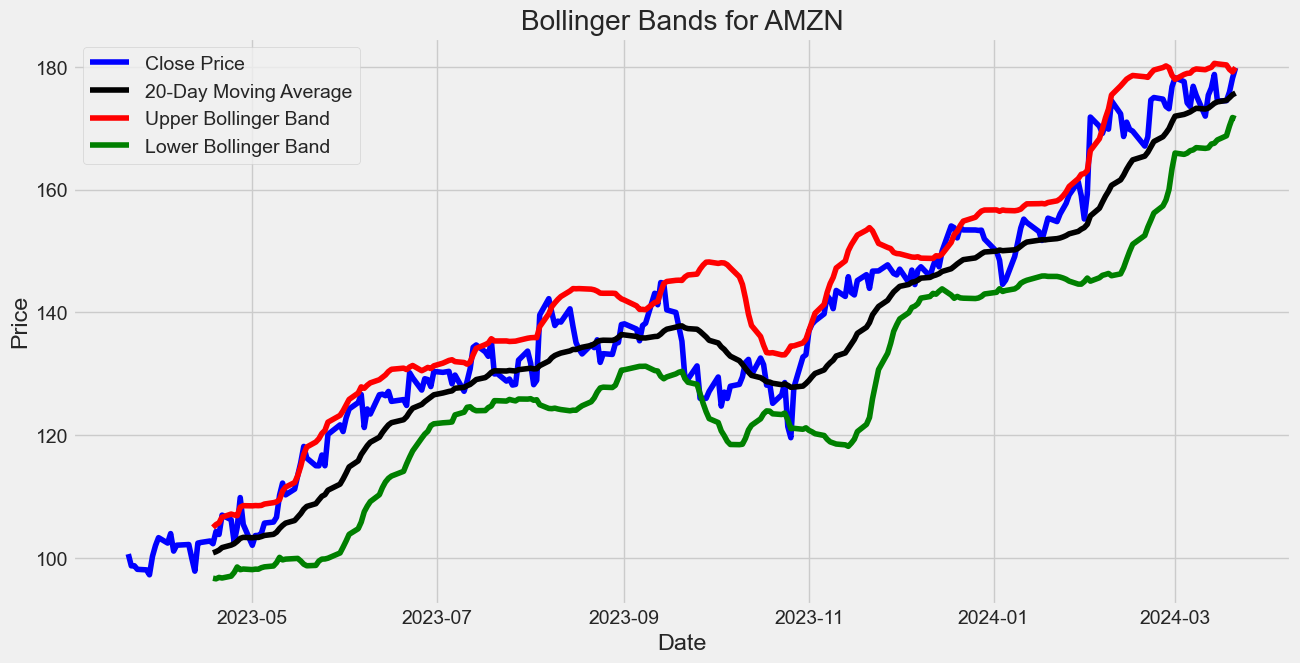

In [128]:
# 볼린저 밴드 계산
AMZN = calculate_bollinger_bands(AMZN)

# 볼린저 밴드 시각화
plt.figure(figsize=(14,7))
plt.plot(AMZN['Close'], label='Close Price', color='blue')
plt.plot(AMZN['MA20'], label='20-Day Moving Average', color='black')
plt.plot(AMZN['Upper'], label='Upper Bollinger Band', color='red')
plt.plot(AMZN['Lower'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands for AMZN')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

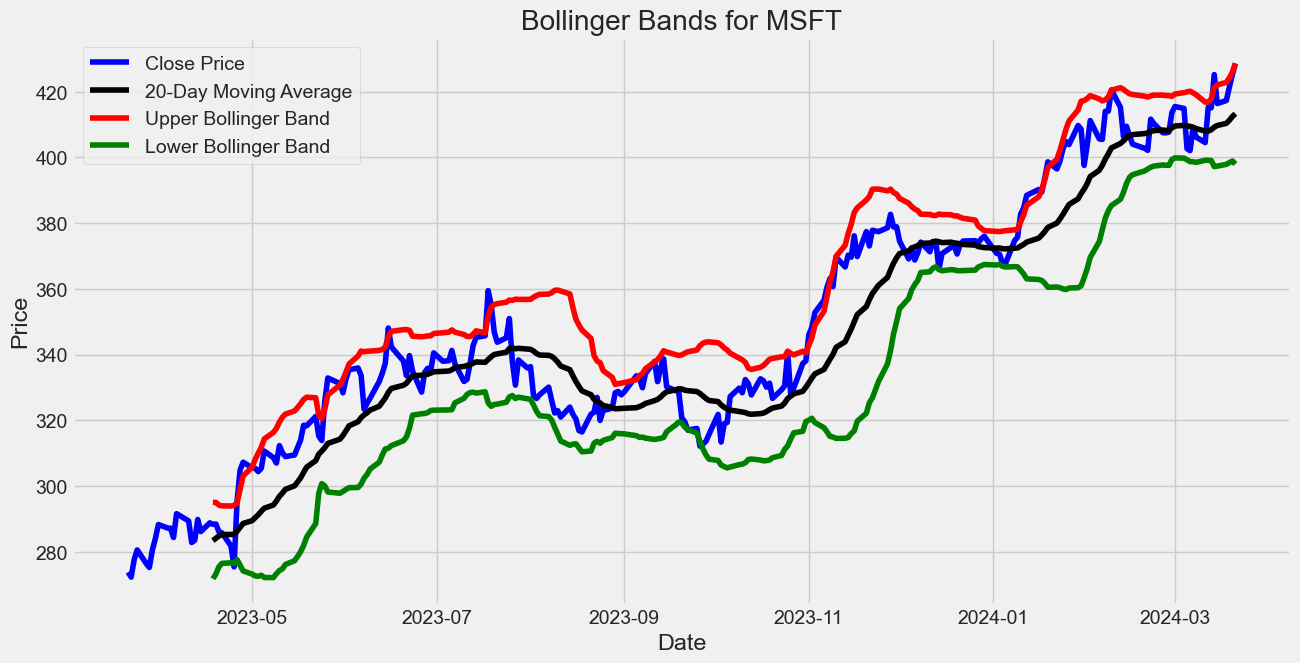

In [129]:
# 볼린저 밴드 계산
MSFT = calculate_bollinger_bands(MSFT)

# 볼린저 밴드 시각화
plt.figure(figsize=(14,7))
plt.plot(MSFT['Close'], label='Close Price', color='blue')
plt.plot(MSFT['MA20'], label='20-Day Moving Average', color='black')
plt.plot(MSFT['Upper'], label='Upper Bollinger Band', color='red')
plt.plot(MSFT['Lower'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands for MSFT')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

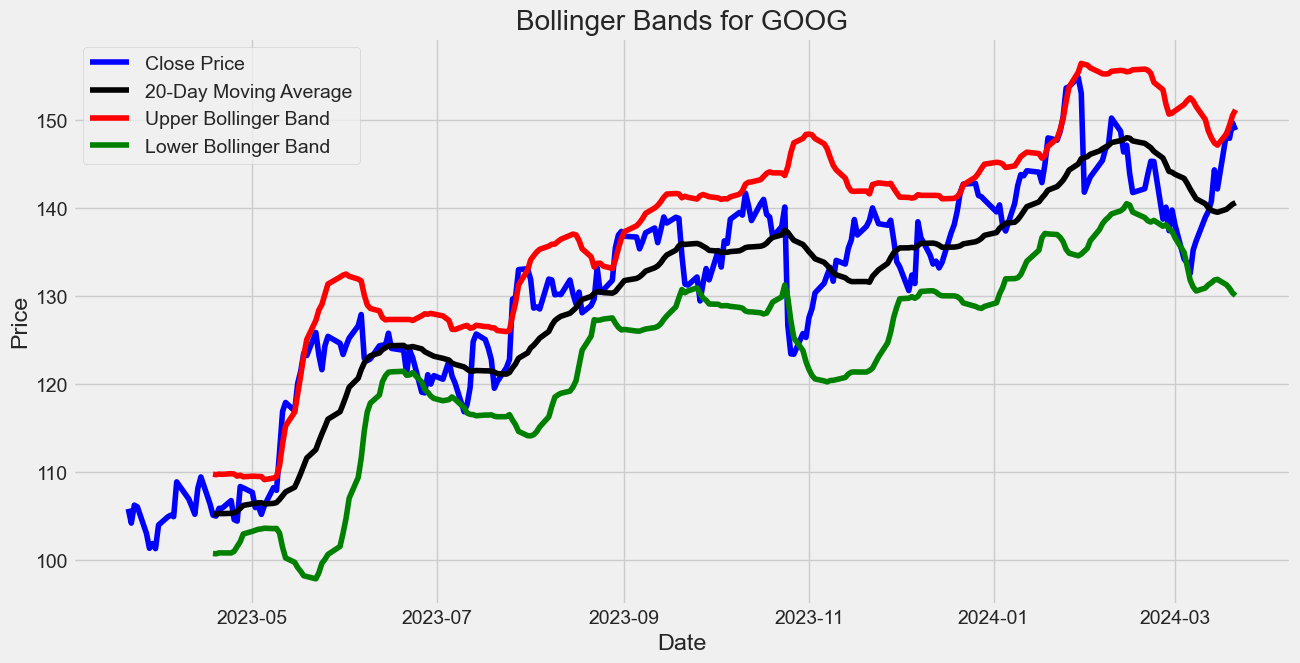

In [130]:
# 볼린저 밴드 계산
GOOG = calculate_bollinger_bands(GOOG)

# 볼린저 밴드 시각화
plt.figure(figsize=(14,7))
plt.plot(GOOG['Close'], label='Close Price', color='blue')
plt.plot(GOOG['MA20'], label='20-Day Moving Average', color='black')
plt.plot(GOOG['Upper'], label='Upper Bollinger Band', color='red')
plt.plot(GOOG['Lower'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands for GOOG')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 데이터 히스토그램

<Figure size 2000x1200 with 0 Axes>

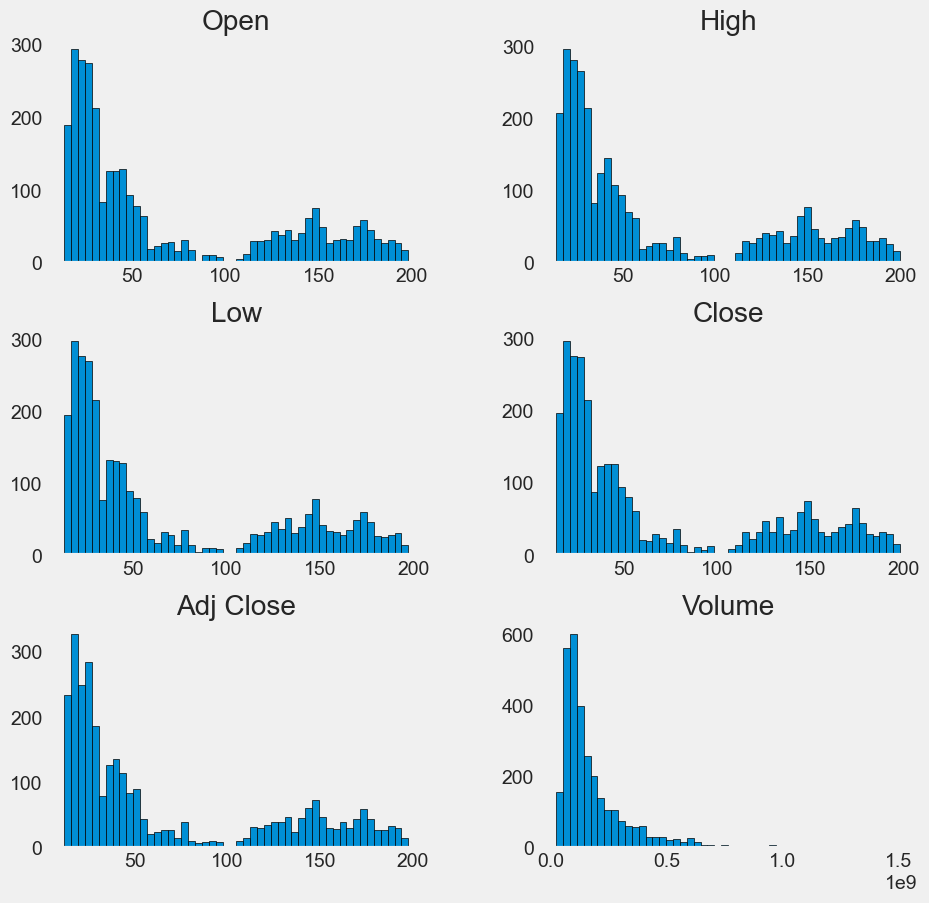

In [131]:
# 전체
plt.figure(figsize=(20,12))
df.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
fig.tight_layout()

<Figure size 2000x1200 with 0 Axes>

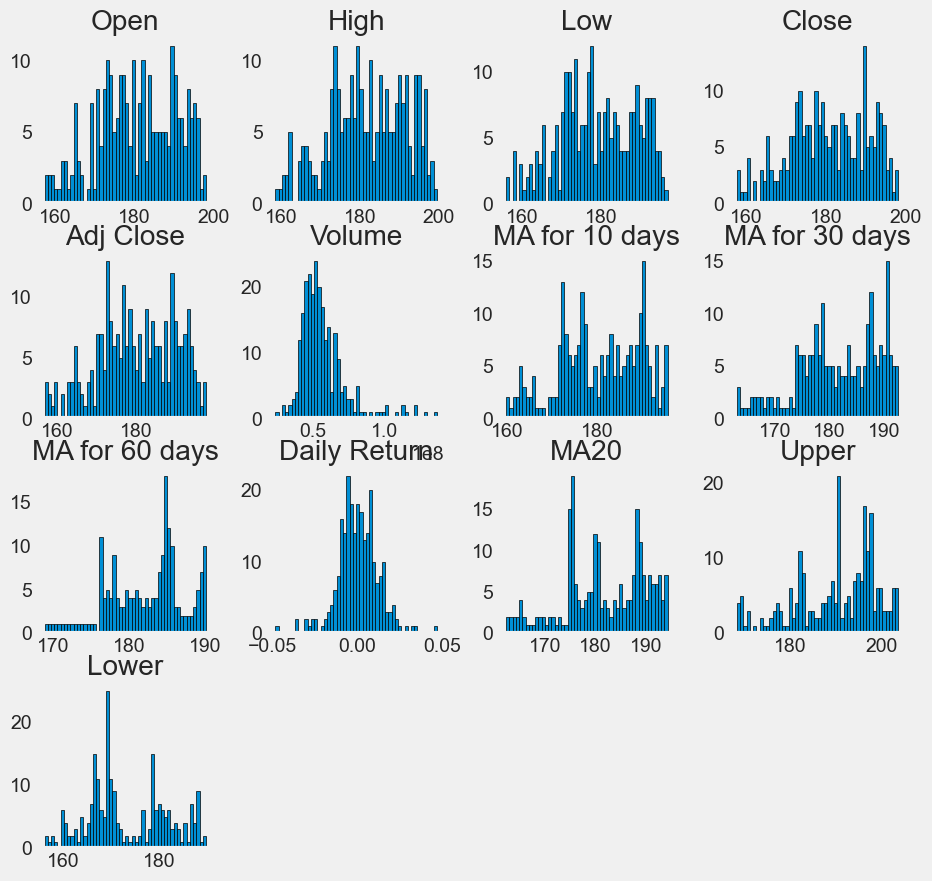

In [132]:
# 애플
plt.figure(figsize=(20,12))
AAPL.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
plt.show()

<Figure size 2000x1200 with 0 Axes>

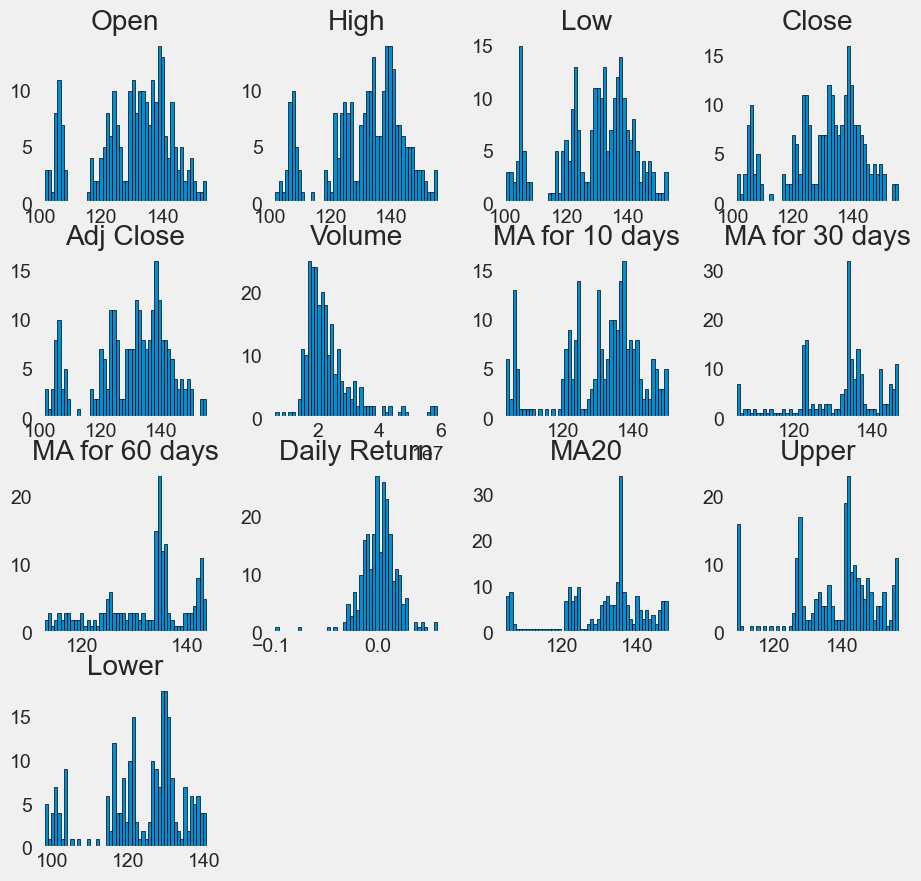

In [133]:
# 구글
plt.figure(figsize=(20,12))
GOOG.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
plt.show()

<Figure size 2000x1200 with 0 Axes>

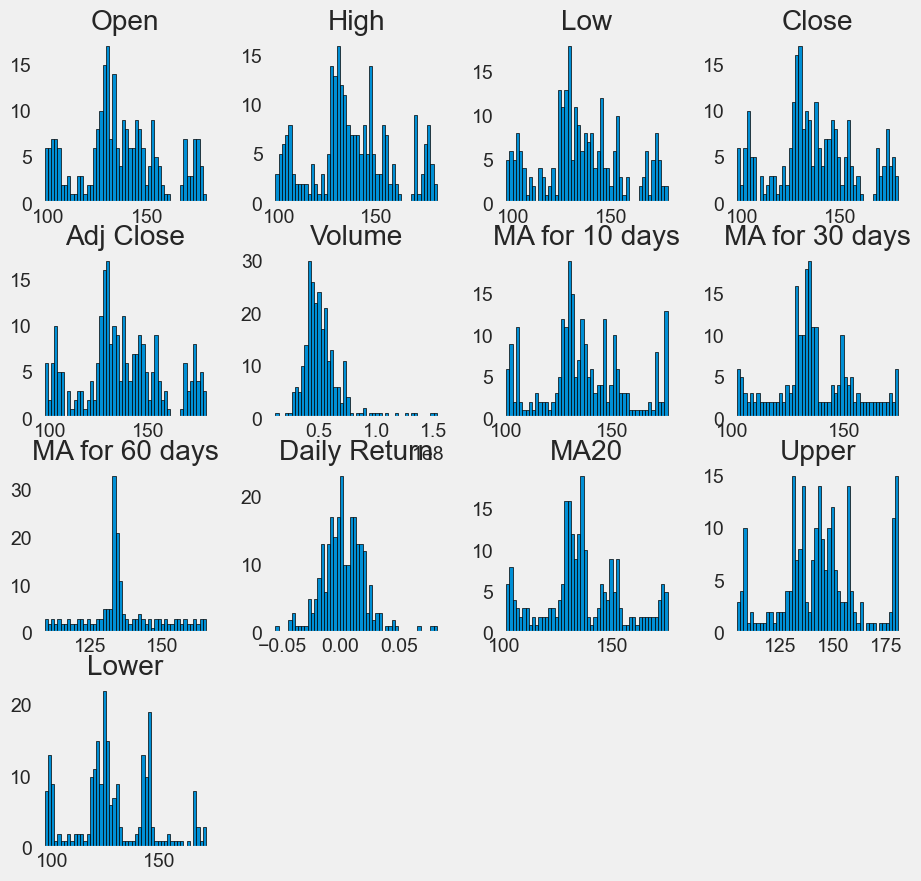

In [134]:
# 아마존
plt.figure(figsize=(20,12))
AMZN.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
plt.show()

<Figure size 2000x1200 with 0 Axes>

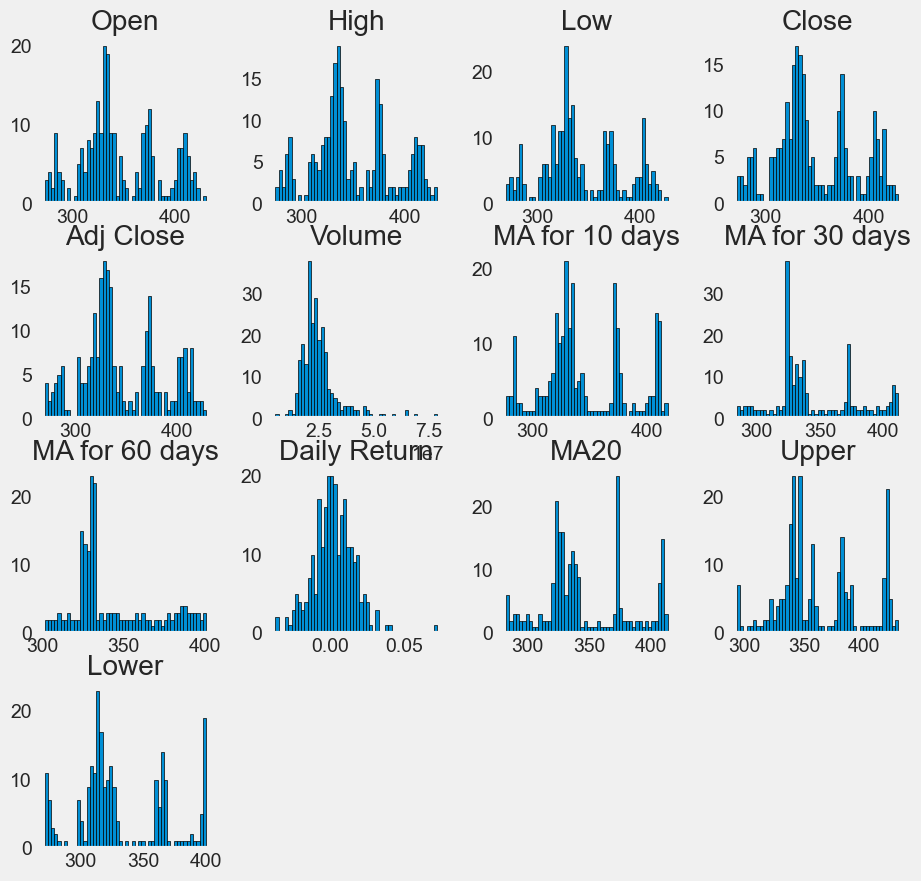

In [135]:
# 마이크로소프트
plt.figure(figsize=(20,12))
MSFT.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
plt.show()

## 백테스팅

In [136]:
!pip install backtrader

In [137]:
import backtrader as bt
from datetime import datetime
import yfinance as yf

class MyStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY  : Price {order.executed.price:.2f}, '
                         f'Size {order.executed.size:.2f}, '
                         f'Commission {order.executed.comm:.2f}, '
                         f'Value {cerebro.broker.getvalue():,.2f}')
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log(f'SELL : Price {order.executed.price:.2f}, '
                         f'Size {order.executed.size:.2f}, '
                         f'Commission {order.executed.comm:.2f}, '
                         f'Value {cerebro.broker.getvalue():,.2f}')
            self.bar_executed = len(self)
        elif order.status in [order.Canceled]:
            self.log('ORDER CANCELED')
        elif order.status in [order.Margin]:
            self.log('ORDER MARGIN')
        elif order.status in [order.Rejected]:
            self.log('ORDER REJECTED')
        self.order = None

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.order = self.buy()
        else:
            if self.rsi > 70:
                self.order = self.sell()

    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)

# yfinance를 사용하여 데이터 불러오기
data = yf.download('GOOGL', start="2014-01-01", end="2024-03-20")
datafeed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(datafeed)

cerebro.broker.set_cash(10000000)
cerebro.broker.setcommission(commission=0.0014)
cerebro.addsizer(bt.sizers.PercentSizer, percents=90)

print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.2f} USD')
cerebro.run()
print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.2f} USD')
cerebro.plot(style='candlestick')


[*********************100%%**********************]  1 of 1 completed

Initial Portfolio Value : 10,000,000.00 USD


[2014-03-27] BUY  : Price 28.30, Size 317711.60, Commission 12587.53, Value 9,855,669.12
[2014-05-28] SELL : Price 28.73, Size -317711.60, Commission 12778.33, Value 10,110,916.93
[2014-10-20] BUY  : Price 26.02, Size 348005.62, Commission 12678.37, Value 10,305,824.06
[2015-03-03] SELL : Price 28.82, Size -348005.62, Commission 14040.11, Value 11,056,874.20
[2016-06-27] BUY  : Price 34.12, Size 290460.81, Commission 13876.56, Value 11,023,391.22
[2016-07-27] SELL : Price 37.95, Size -290460.81, Commission 15431.57, Value 12,138,288.57
[2017-08-18] BUY  : Price 46.35, Size 235527.24, Commission 15283.03, Value 12,113,584.24
[2017-10-16] SELL : Price 50.48, Size -235527.24, Commission 16645.68, Value 13,079,676.10
[2018-10-25] BUY  : Price 54.01, Size 222712.82, Commission 16841.77, Value 13,322,183.68
[2019-03-12] SELL : Price 59.12, Size -222712.82, Commission 18431.94, Value 14,180,238.28
[2019-05-30] BUY  : Price 56.01, Size 227908.89, Commission 17870.45, Value 14,176,726.03
[2019-

<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 5 Axes>]]